
<h1 style='background-color: #6495ED; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' >Predicting Life Expectancy Using Linear Regression

<img src="https://media.licdn.com/dms/image/D4D12AQEVe9gqBelM5Q/article-cover_image-shrink_720_1280/0/1672742379196?e=2147483647&v=beta&t=m8-GsGRllbkFw8PxCnfAlIEkO2OeD8FiZrfIXz0XM90">

<h1 style='background-color:#6495ED ; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Exploratory Data Analysis </h1>


In [106]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [107]:
# loading data
data = pd.read_csv("https://drive.google.com/uc?export=download&id=10nKWCvHYHkdM_KwretKe5mWq47Lc2I99")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#Exercise 1: EDA

Perform some Exploratory Data analysis and give atleast 4 observations explaining each observations with a Figure. Providing answer to the below questions my help but you are free to come up with something else.
- <l1> How does Infant and Adult mortality rates affect life expectancy?</li>
- <l1>Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol.</li>
- <l1>What is the impact of schooling on the lifespan of humans?</li>
- <l1>Do densely populated countries tend to have lower life expectancy?</li>




Checking the total number of rows and columns

In [108]:

data.shape

(2938, 22)

Checking random samples

In [109]:

data.sample(6)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
616,Congo,2007,Developing,58.2,354.0,8,2.75,0.000000,64.0,84,...,71.0,2.54,72.0,5.0,NaN,NaN,8.5,8.2,0.517,9.8
477,Cambodia,2002,Developing,59.3,273.0,23,1.43,30.910606,NaN,1361,...,54.0,5.95,54.0,2.1,339.676984,12634729.0,11.6,11.8,0.427,8.2
2534,Switzerland,2002,Developed,84.0,74.0,0,10.85,6853.628494,NaN,0,...,95.0,1.61,93.0,0.1,41336.721920,7284753.0,0.6,0.5,0.890,15.2
1282,Italy,2015,Developed,82.7,56.0,1,NaN,0.000000,93.0,159,...,93.0,NaN,93.0,0.1,349.147550,673582.0,0.6,0.6,0.881,16.3
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.265270,92.0,190,...,92.0,9.20,92.0,0.1,62245.129000,223424.0,0.6,0.6,0.927,19.8
1933,Oman,2008,Developing,75.2,19.0,1,0.57,123.096630,99.0,18,...,97.0,2.10,99.0,0.1,2275.353600,NaN,6.9,6.8,0.765,11.9


Checking for null values

In [110]:

data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Checking data types

In [111]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [112]:
np.random.seed(42)
data.sample(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2546,Syrian Arab Republic,2006,Developing,73.7,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.24617,18914977.0,6.4,6.3,0.636,11.4
650,Croatia,2006,Developed,75.9,113.0,0,11.83,1555.651986,NaN,1,...,96.0,6.95,96.0,0.1,11363.41845,444.0,1.8,1.8,0.783,13.9


Setting the data type of the Year column from int64to datetime format

In [113]:

data.Year = pd.to_datetime(data.Year, format="%Y")

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2744 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2904 non-null   float64    

Next, we'll deal with the null values


In [115]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [116]:
data.Alcohol.dropna().min()

0.01

In [117]:
data.head(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010-01-01,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009-01-01,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008-01-01,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007-01-01,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006-01-01,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [118]:
data.Alcohol = data.Alcohol.interpolate(method="linear")

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2938 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2904 non-null   float64    

In [120]:
data[data["Hepatitis B"].isnull()==True]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003-01-01,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002-01-01,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001-01-01,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000-01-01,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006-01-01,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004-01-01,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003-01-01,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002-01-01,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001-01-01,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [121]:
data[data["Hepatitis B"].isnull()==True].Country.unique()

array(['Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Australia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Benin', 'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Comoros', 'Congo',
       'Croatia', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland',
       'Gabon', 'Ghana', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Jamaica', 'Japan', 'Kenya',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Malta', 'Mauritania',
       'Montenegro', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Netherlands', 'Niger', 'Nigeria', 'Norway', 'Pakistan', 'Panam

In [122]:
data[data["Hepatitis B"].isnull()==True]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003-01-01,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002-01-01,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001-01-01,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000-01-01,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006-01-01,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004-01-01,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003-01-01,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002-01-01,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001-01-01,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [123]:
data.head(5)
# data.head(25)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


We will fill the missing values in the hepatitis column, using the mean

In [124]:

data["Hepatitis B"] = data["Hepatitis B"].fillna(data["Hepatitis B"])

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2938 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2904 non-null   float64    

In [126]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [127]:
bmi = data[' BMI ']
bmi.head(5)

0    19.1
1    18.6
2    18.1
3    17.6
4    17.2
Name:  BMI , dtype: float64

Observing our data to gain insights on the best method to handle the null values in the BMI column

In [128]:

bmi.iloc[305:350]

305    51.9
306    51.2
307     5.6
308    49.9
309    49.3
310    48.6
311    48.0
312    47.3
313    46.7
314    46.0
315    45.4
316    44.7
317    44.0
318    43.3
319    42.6
320    55.8
321    55.3
322    54.7
323    54.2
324    53.7
325    53.1
326    52.6
327    52.1
328    51.5
329    51.0
330     5.5
331    49.9
332    49.4
333    48.8
334    48.2
335    47.6
336    37.9
337    37.3
338    36.8
339    36.2
340    35.7
341    35.2
342    34.7
343    34.2
344    33.7
345    33.2
346    32.7
347    32.2
348    31.6
349    31.1
Name:  BMI , dtype: float64

In [129]:
# we will do a forward fill
data[' BMI '] = data[' BMI '].fillna(method="ffill")


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2938 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2938 non-null   float64    

In [131]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [132]:
data.Polio[500:559]

500    87.0
501    88.0
502    89.0
503    89.0
504     9.0
505    95.0
506    93.0
507    91.0
508    88.0
509    88.0
510    88.0
511    88.0
512    47.0
513    47.0
514    23.0
515    47.0
516    47.0
517    46.0
518    45.0
519    46.0
520    46.0
521    47.0
522    47.0
523    45.0
524    44.0
525    42.0
526     4.0
527    38.0
528    52.0
529    44.0
530    46.0
531    51.0
532     4.0
533    43.0
534    32.0
535     3.0
536    38.0
537    49.0
538    37.0
539    31.0
540    36.0
541    31.0
542    26.0
543     3.0
544    96.0
545    95.0
546     9.0
547     9.0
548    93.0
549    92.0
550    94.0
551    95.0
552    95.0
553    94.0
554    92.0
555    94.0
556    96.0
557    97.0
558    96.0
Name: Polio, dtype: float64

In [133]:
data[data.Polio.isnull()==True]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1742,Montenegro,2005-01-01,Developing,73.6,133.0,0,2.695,527.307672,NaN,0,...,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004-01-01,Developing,73.5,134.0,0,0.010,57.121901,NaN,0,...,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003-01-01,Developing,73.5,134.0,0,0.010,495.078296,NaN,0,...,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002-01-01,Developing,73.4,136.0,0,0.010,36.480240,NaN,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001-01-01,Developing,73.3,136.0,0,0.010,33.669814,NaN,0,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000-01-01,Developing,73.0,144.0,0,0.010,274.547260,NaN,0,...,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010-01-01,Developing,55.0,359.0,27,4.870,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009-01-01,Developing,54.3,369.0,27,4.465,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008-01-01,Developing,53.6,377.0,27,4.060,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007-01-01,Developing,53.1,381.0,27,3.655,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


We observe here that the Polio values are missing for only three countries, hence we will check each country and fill accordingly

In [134]:
data[data.Country=="Montenegro"]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1732,Montenegro,2015-01-01,Developing,76.1,16.0,0,1.400,0.000000,82.0,0,...,89.0,NaN,89.0,0.1,6461.192554,622159.0,1.8,1.8,0.804,15.1
1733,Montenegro,2014-01-01,Developing,75.9,17.0,0,0.010,726.029176,87.0,0,...,91.0,6.42,91.0,0.1,7378.345289,62181.0,1.8,1.9,0.803,15.1
1734,Montenegro,2013-01-01,Developing,75.8,19.0,0,0.010,707.144691,9.0,0,...,94.0,6.43,94.0,0.1,7186.429787,62127.0,1.8,1.9,0.799,15.1
1735,Montenegro,2012-01-01,Developing,75.6,11.0,0,0.010,648.133178,9.0,0,...,94.0,7.25,94.0,0.1,6586.719290,6261.0,1.9,1.9,0.797,15.1
1736,Montenegro,2011-01-01,Developing,75.4,113.0,0,6.560,666.737437,91.0,5,...,95.0,6.92,95.0,0.1,7318.742449,6279.0,1.9,2.0,0.792,15.1
1737,Montenegro,2010-01-01,Developing,75.3,115.0,0,6.560,635.484938,9.0,5,...,93.0,6.90,94.0,0.1,6682.281158,619428.0,2.0,2.0,0.787,15.0
1738,Montenegro,2009-01-01,Developing,75.0,117.0,0,6.450,489.681870,87.0,0,...,91.0,6.70,92.0,0.1,6698.794390,618294.0,2.0,2.1,0.785,14.6
1739,Montenegro,2008-01-01,Developing,74.6,121.0,0,6.170,709.131123,93.0,0,...,95.0,6.13,95.0,0.1,7325.734740,616969.0,2.1,2.1,0.774,14.2
1740,Montenegro,2007-01-01,Developing,74.2,125.0,0,4.980,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
1741,Montenegro,2006-01-01,Developing,73.8,13.0,0,5.380,595.730692,9.0,0,...,9.0,8.10,9.0,0.1,4383.595970,61525.0,2.2,2.2,0.751,13.2


Given the outcome here and seeing that there are usually large values after every small value, we will fill montenegro with the mean

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2938 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2938 non-null   float64    

In [79]:
data[data.Country=="South Sudan"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015-01-01,Developing,57.3,332.0,26,6.895,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014-01-01,Developing,56.6,343.0,26,6.490,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013-01-01,Developing,56.4,345.0,26,6.085,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012-01-01,Developing,56.0,347.0,26,5.680,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011-01-01,Developing,55.4,355.0,27,5.275,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010-01-01,Developing,55.0,359.0,27,4.870,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009-01-01,Developing,54.3,369.0,27,4.465,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008-01-01,Developing,53.6,377.0,27,4.060,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007-01-01,Developing,53.1,381.0,27,3.655,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006-01-01,Developing,52.5,383.0,28,3.250,0.000000,NaN,0,...,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0


Seeing that there is only one value for South Sudan, we will proceed to drop the rows as one value is not enough to predict the outcomes of 15 other rows

In [81]:
data.Country = data.Country[data.Country=="South Sudan"].dropna(axis=0)

In [137]:
data.Country.isnull().sum()

0

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2938 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2938 non-null   float64    

We will proceed to look at the population column

In [139]:
data[data.Population.isnull()==True]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
64,Antigua and Barbuda,2015-01-01,Developing,76.4,13.0,0,5.205,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.95410,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014-01-01,Developing,76.2,131.0,0,8.560,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.29667,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013-01-01,Developing,76.1,133.0,0,8.580,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.86416,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012-01-01,Developing,75.9,134.0,0,8.180,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.44197,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011-01-01,Developing,75.7,136.0,0,7.840,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.34991,NaN,3.3,3.3,0.782,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,Yemen,2004-01-01,Developing,62.2,247.0,42,0.060,0.000000,43.0,12708,...,72.0,4.90,72.0,0.1,NaN,NaN,13.9,13.9,0.464,8.4
2902,Yemen,2003-01-01,Developing,61.9,249.0,43,0.040,0.000000,38.0,8536,...,61.0,5.00,61.0,0.1,NaN,NaN,14.0,13.9,0.457,8.2
2903,Yemen,2002-01-01,Developing,61.5,25.0,45,0.070,0.000000,31.0,890,...,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
2904,Yemen,2001-01-01,Developing,61.1,251.0,46,0.080,0.000000,19.0,485,...,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9


In [145]:
data[data.Population.isnull()==True].Country.value_counts(dropna=False)

Country
Antigua and Barbuda                                     16
Singapore                                               16
New Zealand                                             16
Oman                                                    16
Qatar                                                   16
Republic of Korea                                       16
Republic of Moldova                                     16
Saint Lucia                                             16
Saint Vincent and the Grenadines                        16
Saudi Arabia                                            16
Slovakia                                                16
Libya                                                   16
Somalia                                                 16
The former Yugoslav republic of Macedonia               16
United Arab Emirates                                    16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                     

In [147]:
data[data.Country=="United States of America"].isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   1
Diphtheria                          0
 HIV/AIDS                           0
GDP                                16
Population                         16
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources    16
Schooling                          16
dtype: int64

We see that asides the United States of America, many countries have null values in all their rows. Hence, we will create a list of all such countries and drop them. We will also drop the other rows with missing values for population.

In [151]:
indices = data[data.Population.isnull()==True].index

In [155]:
data.drop(indices, inplace=True)

In [156]:
data.shape

(2286, 22)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2286 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2286 non-null   object        
 1   Year                             2286 non-null   datetime64[ns]
 2   Status                           2286 non-null   object        
 3   Life expectancy                  2284 non-null   float64       
 4   Adult Mortality                  2284 non-null   float64       
 5   infant deaths                    2286 non-null   int64         
 6   Alcohol                          2286 non-null   float64       
 7   percentage expenditure           2286 non-null   float64       
 8   Hepatitis B                      1804 non-null   float64       
 9   Measles                          2286 non-null   int64         
 10   BMI                             2286 non-null   float64       
 

In [159]:
data[data["Hepatitis B"].isnull()==True]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003-01-01,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002-01-01,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001-01-01,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000-01-01,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006-01-01,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004-01-01,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003-01-01,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002-01-01,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001-01-01,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [161]:
data["Hepatitis B"].head(20)

0     65.0
1     62.0
2     64.0
3     67.0
4     68.0
5     66.0
6     63.0
7     64.0
8     63.0
9     64.0
10    66.0
11    67.0
12    65.0
13    64.0
14    63.0
15    62.0
16    99.0
17    98.0
18    99.0
19    99.0
Name: Hepatitis B, dtype: float64

We will fill the data by using backward fill

In [162]:
data["Hepatitis B"] = data["Hepatitis B"].fillna(method="bfill")

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2286 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2286 non-null   object        
 1   Year                             2286 non-null   datetime64[ns]
 2   Status                           2286 non-null   object        
 3   Life expectancy                  2284 non-null   float64       
 4   Adult Mortality                  2284 non-null   float64       
 5   infant deaths                    2286 non-null   int64         
 6   Alcohol                          2286 non-null   float64       
 7   percentage expenditure           2286 non-null   float64       
 8   Hepatitis B                      2286 non-null   float64       
 9   Measles                          2286 non-null   int64         
 10   BMI                             2286 non-null   float64       
 

In [166]:
# We will fill the total expenditure with forward fill
data["Total expenditure"] = data["Total expenditure"].fillna(method="ffill")

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2286 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2286 non-null   object        
 1   Year                             2286 non-null   datetime64[ns]
 2   Status                           2286 non-null   object        
 3   Life expectancy                  2284 non-null   float64       
 4   Adult Mortality                  2284 non-null   float64       
 5   infant deaths                    2286 non-null   int64         
 6   Alcohol                          2286 non-null   float64       
 7   percentage expenditure           2286 non-null   float64       
 8   Hepatitis B                      2286 non-null   float64       
 9   Measles                          2286 non-null   int64         
 10   BMI                             2286 non-null   float64       
 

In [168]:
data.dropna().shape

(2230, 22)

At this point, we can proceed to drop null values

In [169]:
data.dropna(inplace=True)

In [170]:
data.shape

(2230, 22)

In [171]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [173]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2230,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2.230000e+03,2230.000000,2230.000000,2230.000000,2230.000000
mean,2007-07-04 17:10:36.053811712,68.839462,168.466368,34.189238,4.688749,850.569863,79.759641,2585.247982,37.423094,47.453363,81.497309,6.002888,81.599552,2.077265,6710.794018,1.285438e+07,4.875067,4.936861,0.624812,12.014574
min,2000-01-01 00:00:00,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004-01-01 00:00:00,62.500000,71.000000,0.000000,0.992500,22.120565,75.000000,0.000000,18.725000,1.000000,76.000000,4.400000,77.000000,0.100000,436.516301,1.938082e+05,1.500000,1.500000,0.486000,10.000000
50%,2007-07-02 12:00:00,71.500000,145.500000,3.000000,4.090000,99.722393,90.000000,17.000000,42.000000,4.000000,92.000000,5.870000,92.000000,0.100000,1537.810425,1.370540e+06,2.900000,3.100000,0.669000,12.200000
75%,2011-01-01 00:00:00,75.500000,232.000000,22.000000,7.482500,508.728404,96.000000,425.750000,55.800000,29.000000,97.000000,7.607500,96.000000,1.100000,5236.633341,7.373548e+06,7.300000,7.400000,0.771000,14.400000
max,2015-01-01 00:00:00,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,16.610000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000
std,NaN,9.830078,129.017982,133.294148,4.006432,2188.214128,24.893088,11685.334261,19.857087,181.180765,23.723012,2.356263,23.796556,5.709270,13622.316455,6.174074e+07,4.680947,4.779264,0.206416,3.270858


Now, our data is ready for processing and Model Development

In [183]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#Exercise 2: Data Processing and Model Developement

- Select an appropriate method for dealing with Null values in the data set and briefly coment on your choice

- Select most relevant features for training if need be.

- Split the data into training and testing sets in the ratio 80% : 20% respectively

- Fit a Multilinear Regression and print the mean cross validation score.


In [184]:
data.Status.value_counts()

Status
Developing    1814
Developed      416
Name: count, dtype: int64

In [207]:
num_cols = data.drop(["Status", "Country", "Year"], axis=1)

In [208]:
num_cols.head(2)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


We will normalize the numerical columns first


In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
scaler = MinMaxScaler()

In [211]:
columns = num_cols.columns
columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [217]:
num_cols[columns] = scaler.fit_transform(num_cols[columns])

In [218]:
num_cols.head(2)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.544592,0.362881,0.034444,0.0,0.003659,0.649485,0.005439,0.232283,0.0332,0.031250,0.479680,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.447818,0.373961,0.035556,0.0,0.003774,0.618557,0.002319,0.225722,0.0344,0.572917,0.480911,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092


In [219]:
from sklearn.preprocessing import LabelEncoder


In [221]:
encode = LabelEncoder()

In [225]:
status = data.Status
status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2230, dtype: object

In [228]:
Status = encode.fit_transform(status)
Status

array([1, 1, 1, ..., 1, 1, 1])

In [235]:
encoded_stat = pd.DataFrame(data=Status, columns = ["Status"])
encoded_stat

,Status
0,1
1,1
2,1
3,1
4,1
...,...
2225,1
2226,1
2227,1
2228,1


In [236]:
final_df = num_cols.join(encoded_stat)

In [237]:
final_df.head(2)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,0.544592,0.362881,0.034444,0.0,0.003659,0.649485,0.005439,0.232283,0.0332,0.031250,0.479680,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1.0
1,0.447818,0.373961,0.035556,0.0,0.003774,0.618557,0.002319,0.225722,0.0344,0.572917,0.480911,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1.0


In [250]:
final_df.corr()['Life expectancy '].abs()

Life expectancy                    1.000000
Adult Mortality                    0.675311
infant deaths                      0.173304
Alcohol                            0.426120
percentage expenditure             0.410207
Hepatitis B                        0.130439
Measles                            0.138262
 BMI                               0.592053
under-five deaths                  0.199028
Polio                              0.440651
Total expenditure                  0.221801
Diphtheria                         0.462122
 HIV/AIDS                          0.569337
GDP                                0.464995
Population                         0.023043
 thinness  1-19 years              0.484978
 thinness 5-9 years                0.477993
Income composition of resources    0.765786
Schooling                          0.782757
Status                             0.024421
Name: Life expectancy , dtype: float64

In [262]:
final_df.corr()['Life expectancy '].abs() > 0.2

Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure              True
Hepatitis B                        False
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                           True
GDP                                 True
Population                         False
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
Status                             False
Name: Life expectancy , dtype: bool

In [265]:
final_df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status'],
      dtype='object')

In [270]:
# We want to drop all columns that have an absolute correlation value less than 0.2
df = final_df.drop(['infant deaths', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Population',
       'Status'
       ], axis=1)

In [271]:
df.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.544592,0.362881,0.0,0.003659,0.232283,0.031250,0.479680,0.649485,0.0,0.004889,0.619565,0.603509,0.505274,0.487923
1,0.447818,0.373961,0.0,0.003774,0.225722,0.572917,0.480911,0.618557,0.0,0.005127,0.630435,0.610526,0.502110,0.483092
2,0.447818,0.369806,0.0,0.003759,0.219160,0.614583,0.477833,0.639175,0.0,0.005287,0.637681,0.617544,0.495781,0.478261
3,0.440228,0.375346,0.0,0.004014,0.212598,0.666667,0.501847,0.670103,0.0,0.005608,0.644928,0.628070,0.488397,0.473430
4,0.434535,0.379501,0.0,0.000364,0.207349,0.677083,0.461823,0.680412,0.0,0.000519,0.655797,0.635088,0.478903,0.458937


<Axes: >

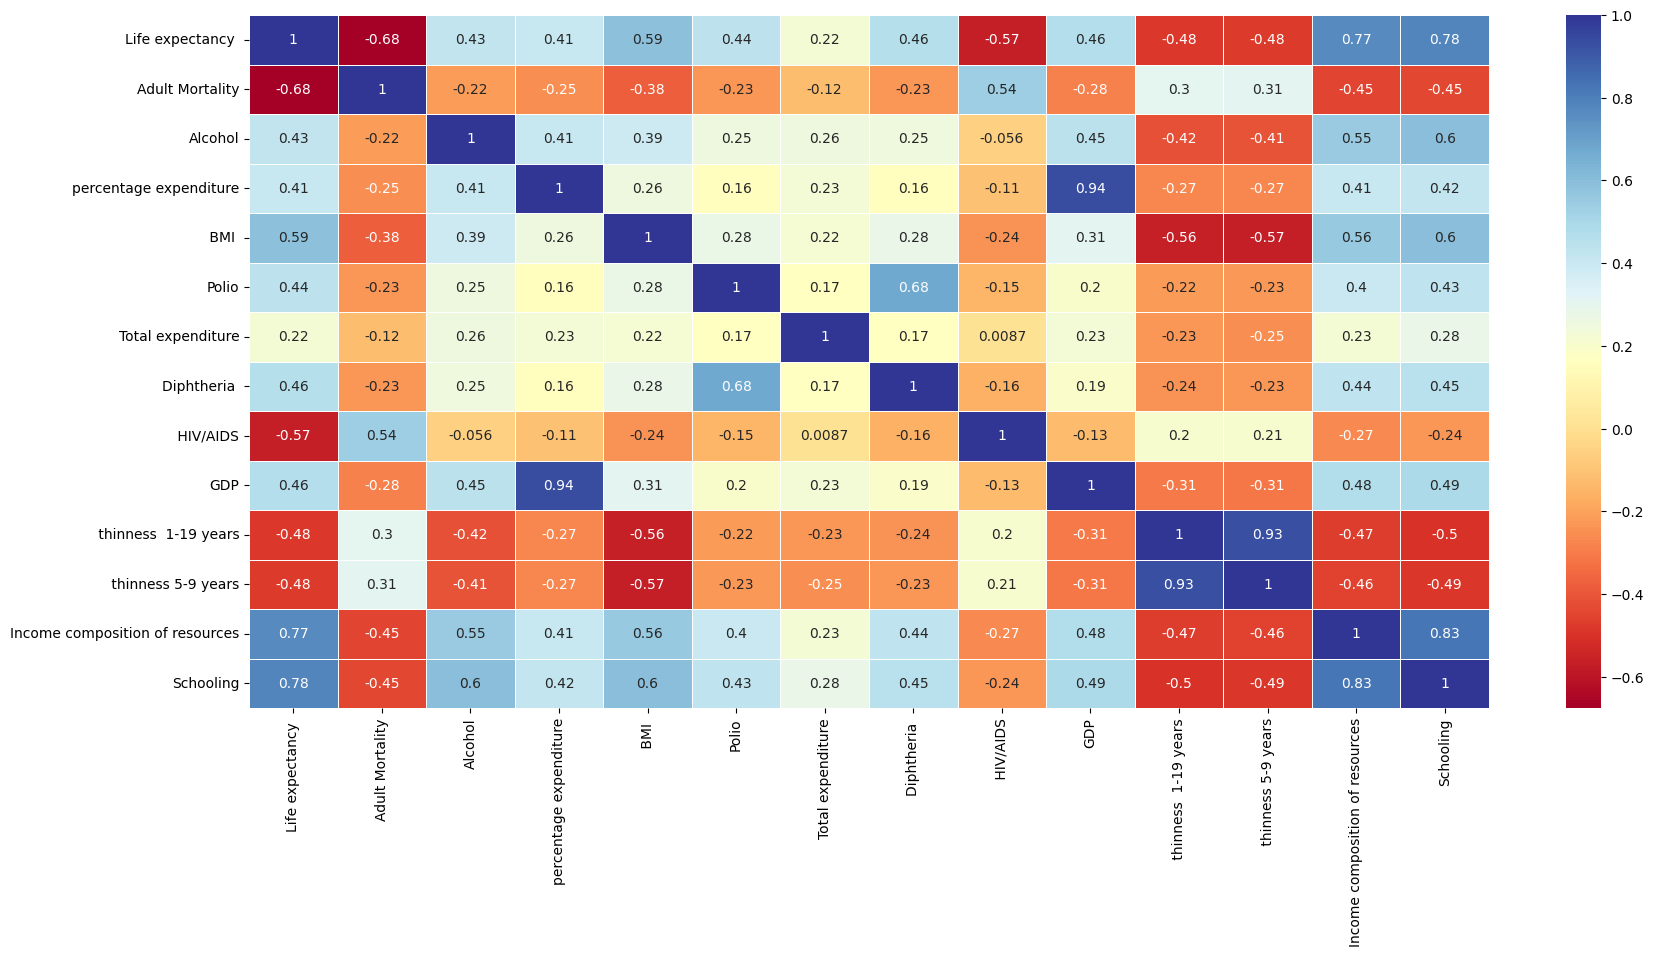

In [277]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), cmap=plt.cm.RdYlBu, annot=True, linewidths= 0.5, linecolor="white")

In [278]:
Y = df['Life expectancy ']
X = df.drop('Life expectancy ', axis=1)

In [279]:
X.head()

,Adult Mortality,Alcohol,percentage expenditure,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.362881,0.0,0.003659,0.232283,0.031250,0.479680,0.649485,0.0,0.004889,0.619565,0.603509,0.505274,0.487923
1,0.373961,0.0,0.003774,0.225722,0.572917,0.480911,0.618557,0.0,0.005127,0.630435,0.610526,0.502110,0.483092
2,0.369806,0.0,0.003759,0.219160,0.614583,0.477833,0.639175,0.0,0.005287,0.637681,0.617544,0.495781,0.478261
3,0.375346,0.0,0.004014,0.212598,0.666667,0.501847,0.670103,0.0,0.005608,0.644928,0.628070,0.488397,0.473430
4,0.379501,0.0,0.000364,0.207349,0.677083,0.461823,0.680412,0.0,0.000519,0.655797,0.635088,0.478903,0.458937


Let's split our data

In [280]:
from sklearn.model_selection import train_test_split


In [281]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)

In [282]:
from sklearn.linear_model import LinearRegression


In [283]:
model = LinearRegression()


In [285]:
model.fit(X_train, Y_train)
train_score = model.score(X_train, Y_train)
print(f"The model train score is: {train_score}")

The model train score is: 0.8414414008930668


In [286]:
# Let's test our model on the test data
test_predictions = model.predict(X_test)

In [291]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error # Note: accuracy_score does not work for regression tasks, rather it works for classification tasks

In [295]:
mse = mean_squared_error(Y_test, test_predictions)
print(f"The score from evaluating the model with mean squared error is: {mse} | Low value indicates good performance from model")

The score from evaluating the model with mean squared error is: 0.005652154932743072 | Low value indicates good performance from model


In [294]:
r2 = r2_score(Y_test, test_predictions)
print(f"The score from evaluating the model with r2 score is: {r2} | The closer to 1 the better")

The score from evaluating the model with r2 score is: 0.8544579072619257 | The closer to 1 the better
